**Bracelets**

Start with any two numbers less than 10.

For example, 1 and 5.


Make a ‘number bracelet’ like this:

1 → 5 → 6 → 1 → 7 → 8 → 5 →


Continue this chain - what happens?


How many different bracelets are there?

This bracelet continues like this:

1 → 5 → 6 → 1 → 7 → 8 → 5 → 3 → 8 → 1 → 9 → 0 → 9 → 9 → 8 → 7 → 5 → 2 → 7 → 9 → 6 → 5 → 1 → 6 → 7 → 3 → 0 → 3 → 3 → 6 → 9 → 5 → 4 → 9 → 3 → 2 → 5 → 7 → 2 → 9 → 1 → 0 → 1 → 1 → 2 → 3 → 5 → 8 → 3 → 1 → 4 → 5 → 9 → 4 → 3 → 7 → 0 → 7 → 7 → 4 → repeats.

Plan:

The rule seems to be to start with the two seeds as the first two terms, and then the next term is the sum of the two previous terms, reducing modulo ten.
Should be easy to write some code to find all of these bracelets. There are 10 numbers less than 10, so there are 100 choices for the starting pair of numbers. It would be interesting to see the distribution in bracelet lengths.

Experiment with changing the modulo. The number of bracelets is likely to be n^2, but the distribution of lengths could be interesting.

The game plan is to make a function in python with an input for the modulus, which then generates the bracelet from every pair of starting values, and records the length of said bracelet, and then counts how many times each length occurs.

Starting with various numbers, here are some bracelet lengths:
- 1 and 5 give 60
- 3 and 7 give 60
- 4 and 4 give 20
- 1 and 8 give 12
- 1 and 2 give 60
- 2 and 2 give 20
- 5 and 5 give 3

doing some code, we find that all bracelets have lengths 1, 3, 4, 12, 20, or 60

In [ ]:
possible_bracelet_lengths = []
bracelet_lengths = []
bracelet_tallies = []

def bracelet(a, b, n):
    bracelet = [a, b]
    pairs = [(a, b)]
    repeat_pair = False
    while not repeat_pair:
        bracelet.append((bracelet[-1] + bracelet[-2]) % n)
        next_pair = (bracelet[-2], bracelet[-1])
        if next_pair in pairs:
            repeat_pair = True
        else:
            pairs.append(next_pair)
    del bracelet[-2:]
    return len(bracelet)

def bracelet_lengths_and_tallies(n):
    global bracelet_lengths
    for p in range(n):
        for q in range(n):
            bracelet_lengths.append(bracelet(p, q, n))
    for length in bracelet_lengths:
        if length not in possible_bracelet_lengths:
            possible_bracelet_lengths.append(length)
    
    possible_bracelet_lengths.sort()
    
    for r in possible_bracelet_lengths:
        bracelet_tallies.append(bracelet_lengths.count(r))
    
    return possible_bracelet_lengths, bracelet_tallies

for n in range(1, 501):
    variable = bracelet_lengths_and_tallies(n)
    print(f'{n} {variable}. Length sum = {sum(variable[0])}. # of lengths = {len(variable[0])}')
    possible_bracelet_lengths = []
    bracelet_lengths = []
    bracelet_tallies = []

1 ([1], [1]). Length sum = 1. # of lengths = 1
2 ([1, 3], [1, 3]). Length sum = 4. # of lengths = 2
3 ([1, 8], [1, 8]). Length sum = 9. # of lengths = 2
4 ([1, 3, 6], [1, 3, 12]). Length sum = 10. # of lengths = 3
5 ([1, 4, 20], [1, 4, 20]). Length sum = 25. # of lengths = 3
6 ([1, 3, 8, 24], [1, 3, 8, 24]). Length sum = 36. # of lengths = 4
7 ([1, 16], [1, 48]). Length sum = 17. # of lengths = 2
8 ([1, 3, 6, 12], [1, 3, 12, 48]). Length sum = 22. # of lengths = 4
9 ([1, 8, 24], [1, 8, 72]). Length sum = 33. # of lengths = 3
10 ([1, 3, 4, 12, 20, 60], [1, 3, 4, 12, 20, 60]). Length sum = 100. # of lengths = 6
11 ([1, 5, 10], [1, 10, 110]). Length sum = 16. # of lengths = 3
12 ([1, 3, 6, 8, 24], [1, 3, 12, 8, 120]). Length sum = 42. # of lengths = 5
13 ([1, 28], [1, 168]). Length sum = 29. # of lengths = 2
14 ([1, 3, 16, 48], [1, 3, 48, 144]). Length sum = 68. # of lengths = 4
15 ([1, 4, 8, 20, 40], [1, 4, 40, 20, 160]). Length sum = 73. # of lengths = 5
16 ([1, 3, 6, 12, 24], [1, 3, 12

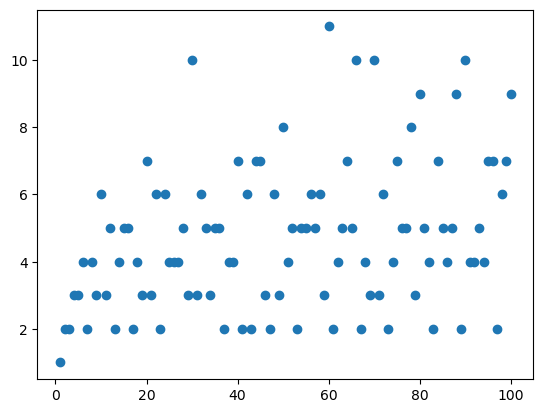

In [23]:
import matplotlib.pyplot as plt
import numpy as np
possible_bracelet_lengths = []
bracelet_lengths = []
bracelet_tallies = []

def bracelet(a, b, n):
    bracelet = [a, b]
    pairs = [(a, b)]
    repeat_pair = False
    while not repeat_pair:
        bracelet.append((bracelet[-1] + bracelet[-2]) % n)
        next_pair = (bracelet[-2], bracelet[-1])
        if next_pair in pairs:
            repeat_pair = True
        else:
            pairs.append(next_pair)
    del bracelet[-2:]
    return len(bracelet)

def bracelet_lengths_and_tallies(n):
    global bracelet_lengths
    for p in range(n):
        for q in range(n):
            bracelet_lengths.append(bracelet(p, q, n))
    for length in bracelet_lengths:
        if length not in possible_bracelet_lengths:
            possible_bracelet_lengths.append(length)
    
    possible_bracelet_lengths.sort()
    
    for r in possible_bracelet_lengths:
        bracelet_tallies.append(bracelet_lengths.count(r))
    
    return possible_bracelet_lengths, bracelet_tallies
x = []
y = []
for n in range(1, 101):
    variable = bracelet_lengths_and_tallies(n)
    x.append(n)
    y.append(len(variable[0]))
    possible_bracelet_lengths = []
    bracelet_lengths = []
    bracelet_tallies = []

plt.scatter(x,y)
plt.show()

The numbers that always have the same period for any bracelet (other than seed (0,0) which always has period 1) are:

2,3,7,13,17,23,37,41,43,47,53,61,67,73,83,89,97

This lines up with sequence A106306 in the OEIS which is doing this same problem.

Another sequence is 